In [ ]:
# Name - Akshat Bhatt
# Email - akshatbhatt1312@gmail.com


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer



In [ ]:
dataframe = pd.read_csv('/content/car data 2.csv');
dataframe.isnull()
print(dataframe.head(10))

        Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0           ritz  2014           3.35           5.59       27000    Petrol   
1            sx4  2013           4.75           9.54       43000    Diesel   
2           ciaz  2017           7.25           9.85        6900    Petrol   
3        wagon r  2011           2.85           4.15        5200    Petrol   
4          swift  2014           4.60           6.87       42450    Diesel   
5  vitara brezza  2018           9.25           9.83        2071    Diesel   
6           ciaz  2015           6.75           8.12       18796    Petrol   
7        s cross  2015           6.50           8.61       33429    Diesel   
8           ciaz  2016           8.75           8.89       20273    Diesel   
9           ciaz  2015           7.45           8.92       42367    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual   

In [ ]:
X=dataframe[['Car_Name','Driven_kms','Present_Price','Fuel_Type','Selling_type','Transmission']]
y=dataframe['Selling_Price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nominal_features=['Fuel_Type','Car_Name','Selling_type','Transmission']
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), nominal_features)
    ],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.3081912891659755


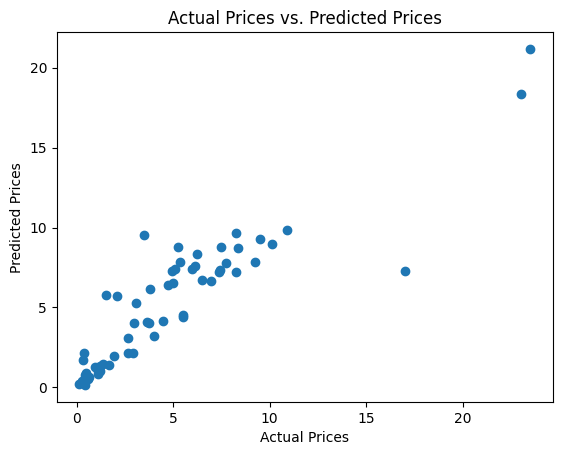

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()